# Árboles de Decisión
### Padecimientos cardíacos

Dado que los árboles de decisión no se basan en distancias para tomar decisiones, entonces no es necesario escalar los datos para este tipo de modelo, su funcionamiento consiste en la toma de decisiones a partir de condiciones mas no de distancias.

# Gráfica dispersión: Edad y Colesterol

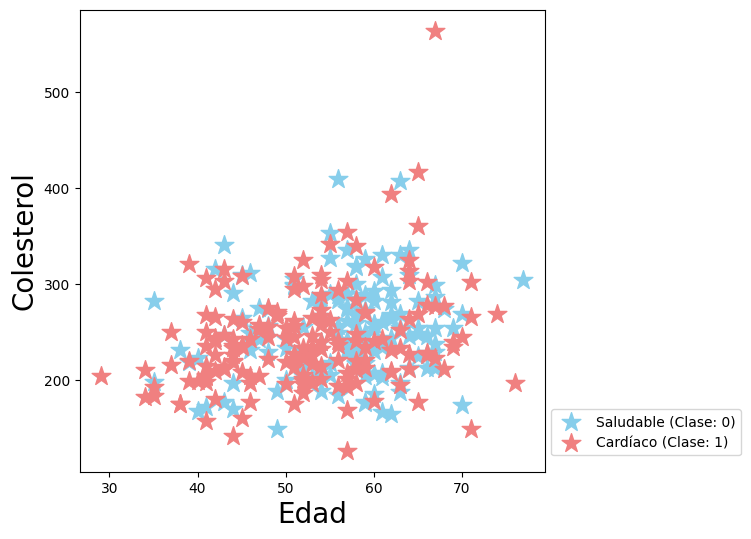

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

pacientes = pd.read_csv("pacientes.csv")

saludables = pacientes[pacientes["problema_cardiaco"]==0]
cardiacos = pacientes[pacientes["problema_cardiaco"]==1]

plt.figure(figsize=(6, 6))
plt.xlabel('Edad', fontsize = 20.0)
plt.ylabel('Colesterol', fontsize = 20.0)
plt.scatter(saludables["edad"], saludables["colesterol"],
            label="Saludable (Clase: 0)", marker="*", c="skyblue", s=200)
plt.scatter(cardiacos["edad"], cardiacos["colesterol"],
            label="Cardíaco (Clase: 1)", marker="*", c="lightcoral", s=200)
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()


In [18]:
pacientes.iloc[100:200]

,edad,colesterol,problema_cardiaco
100,42,244,1
101,59,270,1
102,63,195,1
103,42,240,1
104,50,196,1
...,...,...,...
195,59,326,0
196,46,231,0
197,67,254,0
198,62,267,0


# Entropía:
#### Promedio de información almacenada en una variable aleatoria, entre más dedorden mayor será la entropía, por ejemplo una moneda tiene igual probabilidad de caer cara que sello, hay mucho desorden y la entropía es grande, sin embargo, si la moneda está sesgada, es decir hay mayor probabilidad de que caiga cara que sello puede ser por la distribución de masa en la moneda, entonces la entropía disminuye, la reducción de entropía se traduce en pérdida de información. La fórmula que se usa comunmente para medir la entropía en este tipo de modelos es la entropía de `Shannon` que viene dada por la siguiente fórmula

$E(s) = -
\displaystyle\sum_{i=1}^{n} {p_{i}log_{2}(p_{i})}
$


In [19]:
from scipy.stats import entropy
from math import log

edades = pd.Series([40, 30, 20, 50])
colesterol = pd.Series([100, 110, 100, 110])

print(edades.value_counts()/edades.size)
print(colesterol.value_counts()/colesterol.size)
print(entropy(edades.value_counts()/edades.size, base=2))
print(entropy(colesterol.value_counts()/colesterol.size, base=2))


40    0.25
30    0.25
20    0.25
50    0.25
dtype: float64
100    0.5
110    0.5
dtype: float64
2.0
1.0


En este caso, la entropía es mayor en las edades, este es un buen criterio para elegir los nodos de las ramificaciones de nuestro árbol de decisión.

# Datos de Entrenamiento y Prueba

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    pacientes[["edad", "colesterol"]],
    pacientes["problema_cardiaco"],
    test_size=0.30)


Cuando se cumple el condicional en el arbol de decision nos vamos por la ramificación izquierda, cuando no se cumple por la derecha, con el método `unique()` puedo saber en qué orden se toman las clases para pasar el argumento al visual del árbol

In [44]:
y_train.unique()

array([0, 1])

# Creación del Árbol de Decisión

0.6
|--- Edad <= 54.50
|   |--- Colesterol <= 278.50
|   |   |--- class: 1
|   |--- Colesterol >  278.50
|   |   |--- class: 0
|--- Edad >  54.50
|   |--- Edad <= 63.50
|   |   |--- class: 0
|   |--- Edad >  63.50
|   |   |--- class: 1



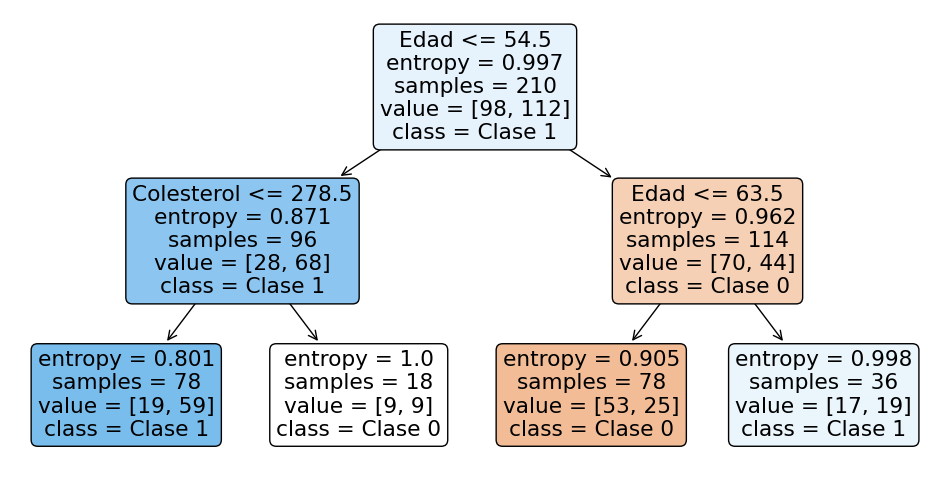

In [45]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="entropy",max_depth = 2)

arbol = arbol_decision.fit(x_train, y_train)

y_pred = arbol_decision.predict(x_test)

y_pred
# Tener cuidado, el siguiente score recibe los features y target reales
accuracy = arbol_decision.score(x_test, y_test)

print(accuracy)

print(tree.export_text(arbol,
                      feature_names=["Edad", "Colesterol"]))
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol,
              feature_names=["Edad", "Colesterol"],
              # La siguiente linea la definimos con el metodo uniques()
              class_names=["Clase 0", "Clase 1"],
              filled=True,
              rounded=True,
               )
plt.show()

# Clasifica a nuevos pacientes

In [48]:
print("Nuevo paciente", arbol_decision.predict([[70, 150]]))

Nuevo paciente [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Para evitar el warning, dado que el arbol de decisión fue entrenado con los nombres de las caracteristicas y la nueva versión de sklearn lo detecta puedo usar lo siguiente

In [53]:
import numpy as np
import warnings

# Ignorar temporalmente las advertencias
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)

    nuevas_caracteristicas = np.array([[70, 150]])
    # Realizar la predicción
    prediccion = arbol_decision.predict(nuevas_caracteristicas)

# Imprimir la predicción
print("Nuevo paciente:", prediccion)


Nuevo paciente: [1]
